# Convolutional Neural Networks

# Importar Librerías

In [1]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
import keras
import tensorflow as tf
from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

Se obtendrán todos los directorios hijo de la ruta y se tomará cada carpeta como un elemento, luego se extraerán las imagenes de cada una.

In [4]:
dirname = os.path.join(os.getcwd(),'C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\DataSet')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\
C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\Asalto 1
C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\Incendio 9549
C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\Inundacion 11143
C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\Robo 12156
C:\Users\alanj\Desktop\IA\Proyectos\CNN\DataSet\Tornado 8765
Directorios leidos: 5
Imagenes en cada directorio [9550, 11143, 12156, 8765, 11706]
suma Total de imagenes en subdirs: 53320


# Creamos las etiquetas

Se crean las etiquetas de cada uno de los subdirectorios. Es importante que todas las imagenes estén en el mismo formato, que tengan la misma medida y los mismos canales RGB.

In [5]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  53320


In [6]:
import pickle
Incidentes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    Incidentes.append(name[len(name)-1])
    indice=indice+1

for i, img in enumerate(images):
    print(f"Image {i} shape: {np.array(img).shape}")
    

# Guardar el mapeo de clases
with open('mapeo_clases.pkl', 'wb') as f:
    pickle.dump(Incidentes, f)

# Guardar los nombres de los directorios
with open('nombres_directorios.pkl', 'wb') as f:
    pickle.dump(directories, f)


0 Asalto
1 Incendio
2 Inundacion
3 Robo
4 Tornado
Image 0 shape: (28, 28, 3)
Image 1 shape: (28, 28, 3)
Image 2 shape: (28, 28, 3)
Image 3 shape: (28, 28, 3)
Image 4 shape: (28, 28, 3)
Image 5 shape: (28, 28, 3)
Image 6 shape: (28, 28, 3)
Image 7 shape: (28, 28, 3)
Image 8 shape: (28, 28, 3)
Image 9 shape: (28, 28, 3)
Image 10 shape: (28, 28, 3)
Image 11 shape: (28, 28, 3)
Image 12 shape: (28, 28, 3)
Image 13 shape: (28, 28, 3)
Image 14 shape: (28, 28, 3)
Image 15 shape: (28, 28, 3)
Image 16 shape: (28, 28, 3)
Image 17 shape: (28, 28, 3)
Image 18 shape: (28, 28, 3)
Image 19 shape: (28, 28, 3)
Image 20 shape: (28, 28, 3)
Image 21 shape: (28, 28, 3)
Image 22 shape: (28, 28, 3)
Image 23 shape: (28, 28, 3)
Image 24 shape: (28, 28, 3)
Image 25 shape: (28, 28, 3)
Image 26 shape: (28, 28, 3)
Image 27 shape: (28, 28, 3)
Image 28 shape: (28, 28, 3)
Image 29 shape: (28, 28, 3)
Image 30 shape: (28, 28, 3)
Image 31 shape: (28, 28, 3)
Image 32 shape: (28, 28, 3)
Image 33 shape: (28, 28, 3)
Image 34

In [7]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [8]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (42656, 28, 28, 3) (42656,)
Testing data shape :  (10664, 28, 28, 3) (10664,)


Text(0.5, 1.0, 'Ground Truth : 2')

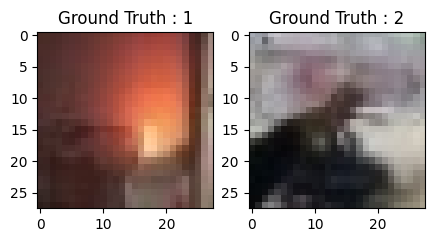

In [9]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

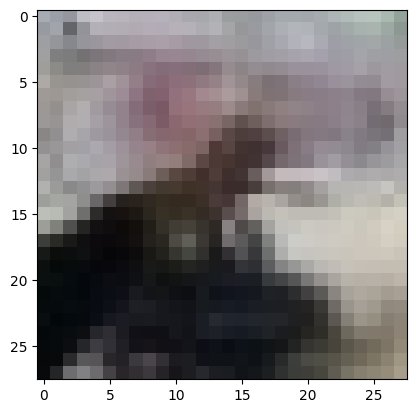

In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [11]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])
print(len(train_X))
print(len(train_Y_one_hot))


Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0.]
42656
42656


# Creamos el Set de Entrenamiento y Validación

In [12]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [13]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(34124, 28, 28, 3) (8532, 28, 28, 3) (34124, 5) (8532, 5)


# Creamos el modelo de CNN

In [14]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [15]:
sport_model = Sequential()
sport_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,3)))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(MaxPooling2D((2, 2),padding='same'))
sport_model.add(Dropout(0.5))
sport_model.add(Flatten())
sport_model.add(Dense(32, activation='linear'))
sport_model.add(LeakyReLU(alpha=0.1))
sport_model.add(Dropout(0.5))
sport_model.add(Dense(nClasses, activation='softmax'))



C:\Users\alanj\anaconda3\envs\prueba_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\alanj\anaconda3\envs\prueba_env\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [16]:
sport_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │       200,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,797 (788.27 KB)

 Trainable params: 201,797 (788.27 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
sport_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100), metrics=['accuracy'])

C:\Users\alanj\anaconda3\envs\prueba_env\lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


# Entrenamos el modelo: Aprende a clasificar imágenes

Aqui se dividirán y entrenarán los clasificadores de cata categoría, aqui mismo podemos saber la presición que se graficará mas adelante

In [18]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
sport_train = sport_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.2704 - loss: 1.5792 - val_accuracy: 0.5444 - val_loss: 1.3922
Epoch 2/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.4439 - loss: 1.3990 - val_accuracy: 0.6471 - val_loss: 1.1288
Epoch 3/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5322 - loss: 1.2161 - val_accuracy: 0.7257 - val_loss: 0.9500
Epoch 4/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.5910 - loss: 1.0809 - val_accuracy: 0.7598 - val_loss: 0.8380
Epoch 5/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.6327 - loss: 0.9880 - val_accuracy: 0.7764 - val_loss: 0.7591
Epoch 6/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6527 - loss: 0.9258 - val_accuracy: 0.8037 - val_loss: 0.6974
Epoch 7/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6844 - loss: 0.8617 - val_accuracy: 0.8240 - val_loss: 0.6452
Epoch 8/20
534/534 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.6986 - loss: 0.8232 - val_accu

In [20]:
sport_model.save('C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\red.h5')
sport_model.save('C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\red.keras')

# Evaluamos la red

Con esto sabremos que tanta precisión y pérdida tiene nuestro dataSet

In [21]:
test_eval = sport_model.evaluate(test_X, test_Y_one_hot, verbose=1)

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9061 - loss: 0.3608


In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.3577828109264374
Test accuracy: 0.9073518514633179


In [23]:
sport_train.history

{'accuracy': [0.3219141960144043,
  0.4747098684310913,
  0.5516937971115112,
  0.5985523462295532,
  0.6379674077033997,
  0.6612941026687622,
  0.6888700127601624,
  0.7065701484680176,
  0.7257941365242004,
  0.743318498134613,
  0.7548059821128845,
  0.7702496647834778,
  0.7790704369544983,
  0.788418710231781,
  0.7988805770874023,
  0.8039795756340027,
  0.8126538395881653,
  0.8209471106529236,
  0.8255186676979065,
  0.8306763768196106],
 'loss': [1.5323996543884277,
  1.34963059425354,
  1.177870750427246,
  1.0560579299926758,
  0.9735729694366455,
  0.909731388092041,
  0.8502061367034912,
  0.8111587166786194,
  0.7699003219604492,
  0.7315636277198792,
  0.7070282697677612,
  0.6723291873931885,
  0.6491884589195251,
  0.6275733113288879,
  0.6093640923500061,
  0.5891583561897278,
  0.5688599944114685,
  0.5561503171920776,
  0.540747880935669,
  0.5252947807312012],
 'val_accuracy': [0.5444210171699524,
  0.6470932960510254,
  0.7257384061813354,
  0.7598453164100647,
 

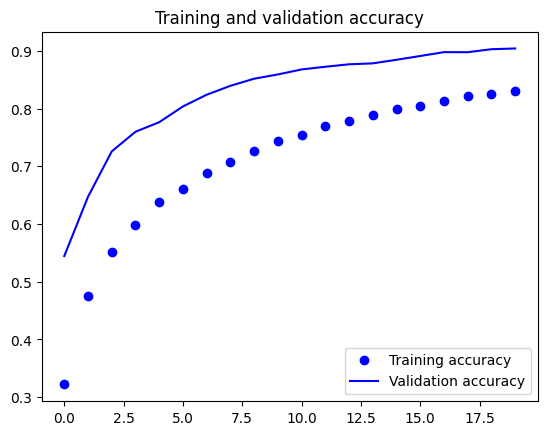

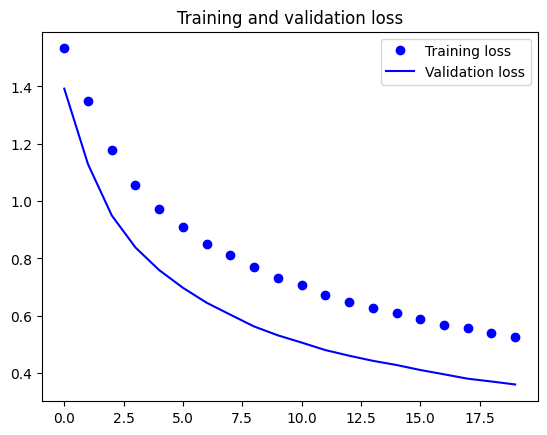

In [24]:
accuracy = sport_train.history['accuracy']
val_accuracy = sport_train.history['val_accuracy']
loss = sport_train.history['loss']
val_loss = sport_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
predicted_classes2 = sport_model.predict(test_X)

334/334 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [26]:
predicted_classes=[]
for predicted_sport in predicted_classes2:
    predicted_classes.append(predicted_sport.tolist().index(max(predicted_sport)))
predicted_classes=np.array(predicted_classes)

In [27]:
predicted_classes.shape, test_Y.shape

((10664,), (10664,))

# Aprendamos de los errores: Qué mejorar

Obtendremos ejemplos de nuestro dataSet, con esto sabremos si se requieren mas ejemplos de alguna cosa en específico

Found 9676 correct labels


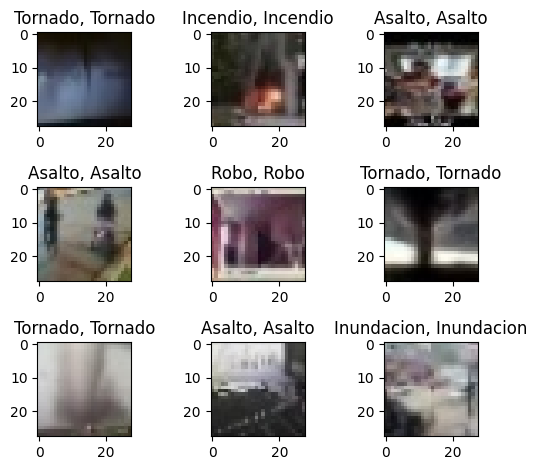

In [28]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[correct]],
                                                    Incidentes[test_Y[correct]]))

    plt.tight_layout()

Found 988 incorrect labels


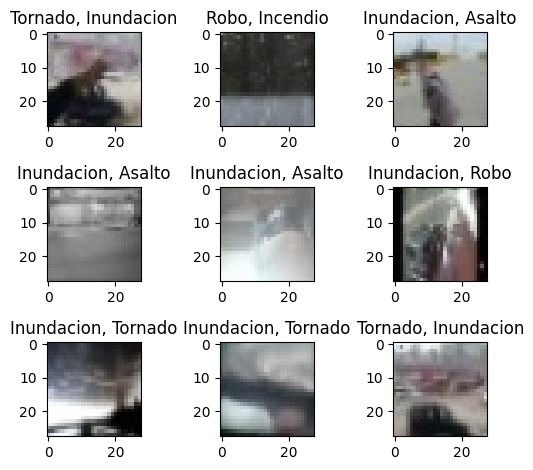

In [29]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(Incidentes[predicted_classes[incorrect]],
                                                    Incidentes[test_Y[incorrect]]))
    plt.tight_layout()

In [30]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.94      0.89      0.91      1954
     Class 1       0.99      0.98      0.98      2192
     Class 2       0.79      0.92      0.85      2408
     Class 3       0.94      0.89      0.92      1784
     Class 4       0.92      0.86      0.89      2326

    accuracy                           0.91     10664
   macro avg       0.92      0.91      0.91     10664
weighted avg       0.91      0.91      0.91     10664



# Comparaciones

Tenemos dos fragmentos para esto, vamos a hacerlo solo en analisis y también que nos devuelva la imagen con un texto alusivo

In [54]:
import pickle
from skimage.transform import resize
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Cargar el modelo entrenado desde el archivo .h5
sport_model = load_model('C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\red.h5')

# Cargar el mapeo de clases
with open('C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\mapeo_clases.pkl', 'rb') as f:
    Incidentes = pickle.load(f)

# Lista de imágenes a predecir
filenames = ['C:\\Users\\alanj\\Desktop\\IA\\Proyectos\\CNN\\Incendio2.jpg']

images = []
for filepath in filenames:
    image = plt.imread(filepath, 0)
    image_resized = resize(image, (28, 28), anti_aliasing=True, clip=False, preserve_range=True)
    images.append(image_resized)

X = np.array(images, dtype=np.uint8)  # Convierto de lista a numpy
test_X = X.astype('float32') / 255.

# Realizar predicciones
predicted_classes = sport_model.predict(test_X)

# Imprimir las predicciones
for i, img_tagged in enumerate(predicted_classes):
    predicted_label = Incidentes[np.argmax(img_tagged)]
    print(filenames[i], predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
C:\Users\alanj\Desktop\IA\Proyectos\CNN\Incendio2.jpg Incendio
